In [1]:
import torch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

from bread.vis import *
from bread.data import Features, SegmentationFile, Microscopy


In [2]:
general_model_path = '/home/farzaneh/Documents/Bread/bread/src/bread/algo/lineage/saved_models/best_model_thresh8_frame_num8_normalized_False.pth'
model = LineageNN([64,64,5])
model.load_state_dict(torch.load(general_model_path))
light_green = '#90EE90'
light_red = '#FFC0CB'



# Plot examples from colony 0


# plot an example of neighbors


In [ ]:

# fig , axs = plt.subplots(1,4)
def plot_and_save_sample(seg, vis, feat, time_index, bud_id, parent_id, candidates, colony_id, image_save_path):
    for i, time_id in enumerate(range(time_index,time_index+8)):
        plt.close('all')

        # figax =(fig, sp[1][i])
        figax = None
        figax = plot_visible(vis, time_id, figax=figax)
        figax = plot_segmentation(seg, time_id, cellids=True, figax=figax, alpha=0.2)
        figax = plot_debug_cell(time_id, bud_id, feat, figax=figax, color='yellow')
        figax = plot_debug_cell(time_id, parent_id, feat, figax=figax, color=light_green)
        figax = plot_debug_pair(time_id, bud_id, parent_id, feat, figax=figax, color='green')
        for candid in candidates:
            figax = plot_debug_cell(time_id, candid, feat, figax=figax, color='red')
            # figax = plot_debug_pair(time_id, bud_id, candid, feat, figax=figax, color='cyan')


        center = get_center(seg, time_id, bud_id)
        y = center[0]
        x = center[1]

        figax[1].set_xlim((x-80, x+80))
        figax[1].set_ylim((y-80, y+80))
        figax[0].set_dpi(140)

        # figax[0].tight_layout() 

        plt.savefig(image_save_path+'error_c{}_bud{}_parent{}_t{}.png'.format(colony_id, bud_id, parent_id, time_id))

        # plt.savefig(errors_external_subset_path+'error_t{}_b{}_p{}_c{}.png'.format(time_id, bud_id, parent_id, candid))
        
# plt.show()

In [ ]:
image_save_path = 'examples_colony_0/'
vis = Microscopy.from_tiff('/home/farzaneh/Documents/Bread/bread/data/colony000_microscopy.tif')
seg = SegmentationFile.from_h5('/home/farzaneh/Documents/Bread/bread/data/colony000_segmentation.h5').get_segmentation('FOV0')
feat = Features(seg)
# vis = Microscopy.from_tiff('/home/farzaneh/Documents/Bread/bread/src/bread/tests/data/colonies/colony003_microscopy.tif')
# seg = SegmentationFile.from_h5('/home/farzaneh/Documents/Bread/bread/src/bread/tests/data/colonies/colony003_segmentation.h5').get_segmentation('FOV0')
feat = Features(seg)
colony_id = 0
time_index = 115
bud_id = 146
parent_id = 14
candidates = [49,142,131,19]
plot_and_save_sample(seg, vis, feat, time_index, bud_id, parent_id, candidates, colony_id, image_save_path)

In [ ]:
image_save_path = 'examples_colony_0/'
vis = Microscopy.from_tiff('/home/farzaneh/Documents/Bread/bread/data/colony000_microscopy.tif')
seg = SegmentationFile.from_h5('/home/farzaneh/Documents/Bread/bread/data/colony000_segmentation.h5').get_segmentation('FOV0')
feat = Features(seg)
feat = Features(seg)
colony_id = 0
time_index = 59
bud_id = 25
parent_id = 10
candidates = [2,17]
plot_and_save_sample(seg, vis, feat, time_index, bud_id, parent_id, candidates, colony_id, image_save_path)

# plot expansion vector


In [3]:
def plot_and_save_expansion(seg, vis, feat, time_index, bud_id, parent_id, candidates, colony_id, image_save_path):
    for i, time_id in enumerate(range(time_index,time_index+8)):
        plt.close('all')

        # figax =(fig, sp[1][i])
        figax = None
        figax = plot_visible(vis, time_id, figax=figax)
        figax = plot_segmentation(seg, time_id, cellids=True, figax=figax, alpha=0.2)
        figax = plot_debug_cell(time_id, bud_id, feat, figax=figax, color='yellow')
        figax = plot_debug_cell(time_id, parent_id, feat, figax=figax, color=light_green)
        figax = plot_expansion_vector(time_id, bud_id, parent_id, feat, figax=figax, color='green')
        for candid in candidates:
            figax = plot_debug_cell(time_id, candid, feat, figax=figax, color='red')
            # figax = plot_expansion_vector(time_id, bud_id, candid, feat, figax=figax)


        center = get_center(seg, time_id, bud_id)
        y = center[0]
        x = center[1]

        figax[1].set_xlim((x-80, x+80))
        figax[1].set_ylim((y-80, y+80))
        figax[0].set_dpi(140)

        # figax[0].tight_layout() 

        plt.savefig(image_save_path+'expansion_c{}_bud{}_parent{}_t{}.png'.format(colony_id, bud_id, parent_id, time_id))

        # plt.savefig(errors_external_subset_path+'error_t{}_b{}_p{}_c{}.png'.format(time_id, bud_id, parent_id, candid))
        
plt.show()

In [ ]:
image_save_path = 'examples_colony_0/'
vis = Microscopy.from_tiff('/home/farzaneh/Documents/Bread/bread/data/colony000_microscopy.tif')
seg = SegmentationFile.from_h5('/home/farzaneh/Documents/Bread/bread/data/colony000_segmentation.h5').get_segmentation('FOV0')
feat = Features(seg)
colony_id = 0
time_index = 59
bud_id = 25
parent_id = 10
candidates = [2,17]
plot_and_save_expansion(seg, vis, feat, time_index, bud_id, parent_id, candidates, colony_id, image_save_path)

In [ ]:
image_save_path = 'examples_colony_0/'
vis = Microscopy.from_tiff('/home/farzaneh/Documents/Bread/bread/data/colony000_microscopy.tif')
seg = SegmentationFile.from_h5('/home/farzaneh/Documents/Bread/bread/data/colony000_segmentation.h5').get_segmentation('FOV0')
feat = Features(seg)
colony_id = 0
time_index = 64
bud_id = 30
parent_id = 4
candidates = [15]
plot_and_save_expansion(seg, vis, feat, time_index, bud_id, parent_id, candidates, colony_id, image_save_path)

# visualize position bud


In [8]:
def plot_and_save_position(seg, vis, feat, time_index, bud_id, parent_id, candidates, colony_id, image_save_path):
    for i, time_id in enumerate(range(time_index,time_index+8)):
        plt.close('all')

        # figax =(fig, sp[1][i])
        figax = None
        figax = plot_visible(vis, time_id, figax=figax)
        figax = plot_segmentation(seg, time_id, cellids=True, figax=figax, alpha=0.2)
        figax = plot_debug_cell(time_id, bud_id, feat, figax=figax, color='yellow')
        figax = plot_debug_cell(time_id, parent_id, feat, figax=figax, color=light_green)
        figax = plot_position(time_id, bud_id, parent_id, feat, figax=figax, color='green')
        for candid in candidates:
            figax = plot_debug_cell(time_id, candid, feat, figax=figax, color='red')
            figax = plot_position(time_id, bud_id, candid, feat, figax=figax)


        center = get_center(seg, time_id, bud_id)
        y = center[0]
        x = center[1]

        figax[1].set_xlim((x-80, x+80))
        figax[1].set_ylim((y-80, y+80))
        figax[0].set_dpi(140)

        plt.savefig(image_save_path+'position_c{}_bud{}_parent{}_t{}.png'.format(colony_id, bud_id, parent_id, time_id))


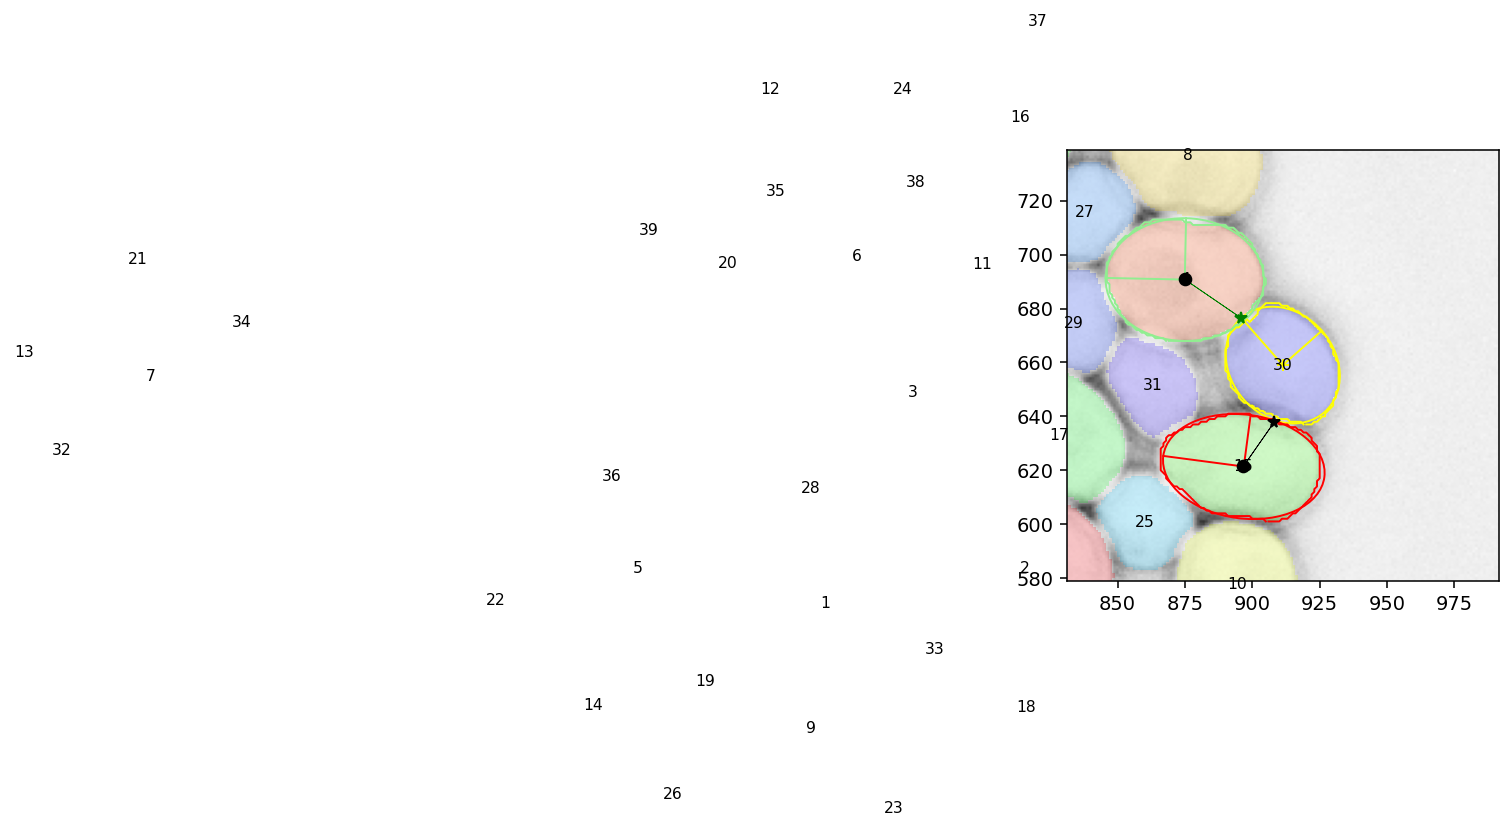

In [9]:
image_save_path = 'examples_colony_0/'
vis = Microscopy.from_tiff('/home/farzaneh/Documents/Bread/bread/data/colony000_microscopy.tif')
seg = SegmentationFile.from_h5('/home/farzaneh/Documents/Bread/bread/data/colony000_segmentation.h5').get_segmentation('FOV0')
feat = Features(seg)
colony_id = 0
time_index = 64
bud_id = 30
parent_id = 4
candidates = [15]
plot_and_save_position(seg, vis, feat, time_index, bud_id, parent_id, candidates, colony_id, image_save_path)

# orientation


In [10]:
def plot_and_save_orientation(seg, vis, feat, time_index, bud_id, parent_id, candidates, colony_id, image_save_path):
    for i, time_id in enumerate(range(time_index,time_index+8)):
        plt.close('all')

        # figax =(fig, sp[1][i])
        figax = None
        figax = plot_visible(vis, time_id, figax=figax)
        figax = plot_segmentation(seg, time_id, cellids=True, figax=figax, alpha=0.2)
        figax = plot_debug_cell(time_id, bud_id, feat, figax=figax, color='yellow')
        figax = plot_debug_cell(time_id, parent_id, feat, figax=figax, color=light_green)
        figax = plot_orientation(time_id, bud_id, parent_id, feat, figax=figax, color='green')
        for candid in candidates:
            figax = plot_debug_cell(time_id, candid, feat, figax=figax, color='red')
            figax = plot_orientation(time_id, bud_id, candid, feat, figax=figax)


        center = get_center(seg, time_id, bud_id)
        y = center[0]
        x = center[1]

        figax[1].set_xlim((x-80, x+80))
        figax[1].set_ylim((y-80, y+80))
        figax[0].set_dpi(140)

        plt.savefig(image_save_path+'orientation_c{}_bud{}_parent{}_t{}.png'.format(colony_id, bud_id, parent_id, time_id))


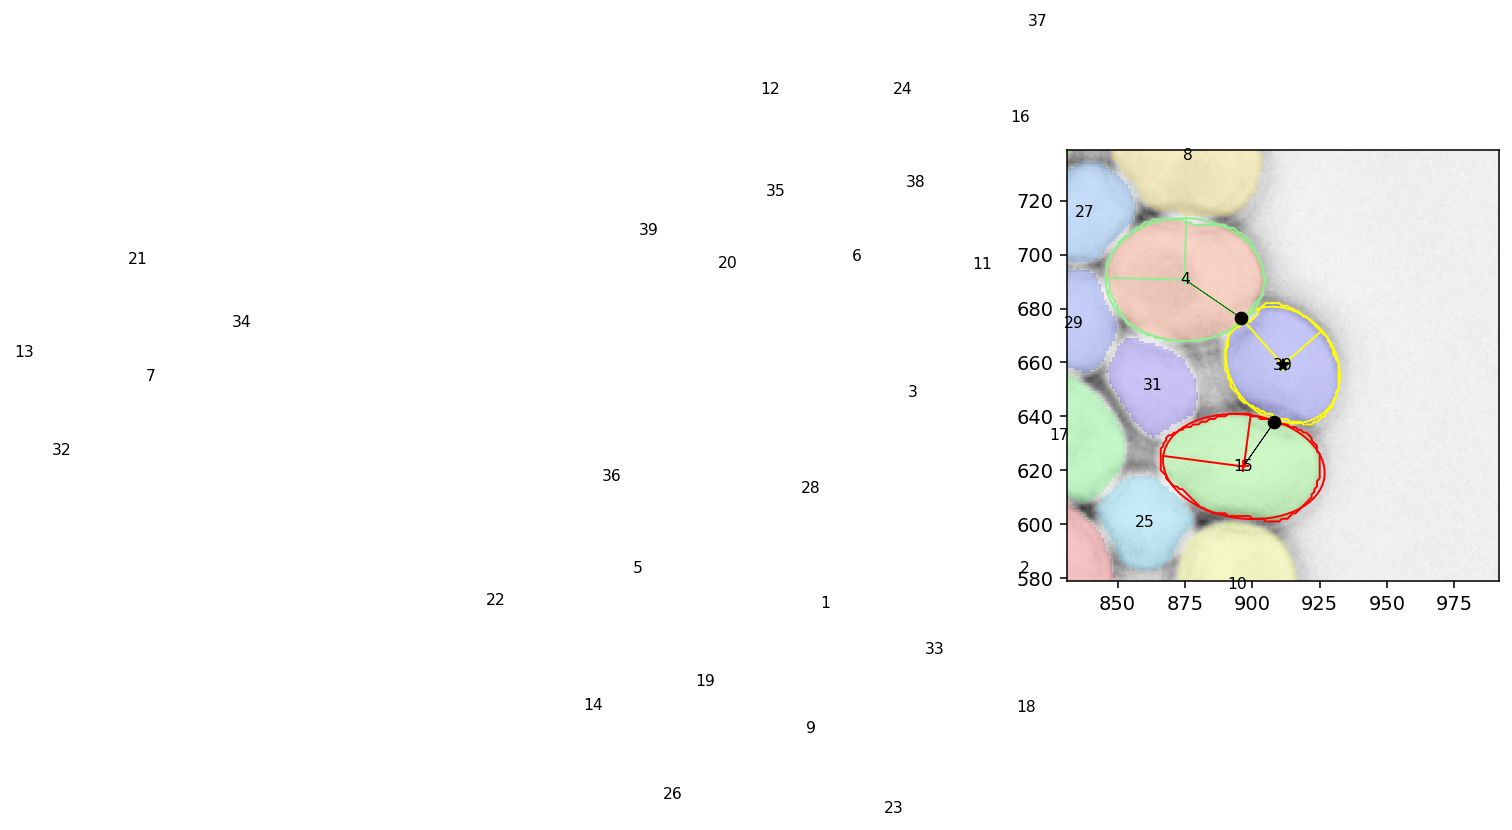

In [11]:
image_save_path = 'examples_colony_0/'
vis = Microscopy.from_tiff('/home/farzaneh/Documents/Bread/bread/data/colony000_microscopy.tif')
seg = SegmentationFile.from_h5('/home/farzaneh/Documents/Bread/bread/data/colony000_segmentation.h5').get_segmentation('FOV0')
feat = Features(seg)
colony_id = 0
time_index = 64
bud_id = 30
parent_id = 4
candidates = [15]
plot_and_save_orientation(seg, vis, feat, time_index, bud_id, parent_id, candidates, colony_id, image_save_path)